In [472]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import *
import seaborn as sns
from pandas import DataFrame
import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows', 20)

## Prepare Factors

In [473]:
factors_load = pd.read_csv(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\factors.csv')\

## Calcuate most recent year of data for each player, that will be the data we feed into the model
factors_load['recent_season'] = factors_load.groupby(['player_name'])['year'].rank(method="first", ascending=False)

## Remove columns that could be null in 2023, and player names
factors_prep = factors_load.drop(['matches_y','year_int','predicted_year'], axis = 1)

## Join on available players in 2024 season. Split out 2023 factors to run through model

current_players = pd.read_csv(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\current_players.csv')\

factors_current = factors_prep.merge(current_players, on=['player_name'],how='inner')

factors_prep_23 = factors_current.query('recent_season == 1').drop(['avg_score','recent_season'], axis = 1)

# # Drop nulls (165 rows dropped, leaving 2837 after removing Nulls)
factors_prep = factors_prep.dropna(axis= 0, how='any')
factors_prep_23 = factors_prep_23.dropna(axis= 0, how='any')

## Remove Player Name so it doesn't treat as dummy variable
factors = factors_prep.drop(['player_name'], axis = 1)
factors_23 = factors_prep_23.drop(['player_name'], axis = 1)

# ## Convert position variables into category column. Could also consider category_encoders sklearn package
factors['position_grouped'] = factors['position_grouped'].astype('category')
factors['position_grouped_simple'] = factors['position_grouped_simple'].astype('category')

factors_23['position_grouped'] = factors_23['position_grouped'].astype('category')
factors_23['position_grouped_simple'] = factors_23['position_grouped_simple'].astype('category')


# ## One hot encoding to convert category variables into dummy columns
factors = pd.get_dummies(factors)

factors_23 = pd.get_dummies(factors_23)


print(factors.shape)
print(factors_23.shape)




(3035, 187)
(501, 185)


## Load factors and limit data file to only those we want to focus on

In [474]:
factors = factors[[
    'avg_score'
    # ,'age_1yr'
    ,'years_active'
    # ,'player_height_cm_1yr'
    # ,'player_weight_kg_1yr'
    # ,'afl_fantasy_score_1yr'
    # ,'afl_fantasy_score_3yr'
    # ,'afl_fantasy_score_5yr'
    ,'fantasy_score_yearly_change'
    ,'fantasy_score_yearly_change_exp'
    ,'fantasy_score_inyear_change'
    ,'kicks_1yr'
    ,'marks_1yr'
    ,'handballs_1yr'
    # ,'disposals_1yr'
    # ,'position_grouped_BP'
    # ,'position_grouped_C'
    # ,'position_grouped_CHB'
    # ,'position_grouped_CHF'
    # ,'position_grouped_FB'
    # ,'position_grouped_FF'
    # ,'position_grouped_FP'
    # ,'position_grouped_HBF'
    # ,'position_grouped_HFF'
    # ,'position_grouped_RUCK'
    # ,'position_grouped_W'
    ,'position_grouped_simple_Key_Position'
    ,'position_grouped_simple_Centres'
    ,'position_grouped_simple_Wings_Flank'
    ,'position_grouped_simple_Ruck'
    ,'effective_disposals_1yr'
    ,'disposal_efficiency_percentage_1yr'
    ,'goals_1yr'
    ,'behinds_1yr' 
    ,'hitouts_1yr'
    ,'tackles_1yr'
    ,'rebounds_1yr'
    ,'inside_fifties_1yr'
    ,'clearances_1yr'
    ,'clangers_1yr'
    ,'free_kicks_for_1yr'
    ,'free_kicks_against_1yr'
    ,'brownlow_votes_1yr'
    ,'contested_possessions_1yr'
    ,'uncontested_possessions_1yr'
    ,'contested_marks_1yr'
    ,'marks_inside_fifty_1yr'
    ,'one_percenters_1yr'
    ,'bounces_1yr'
    ,'goal_assists_1yr'
    ,'time_on_ground_percentage_1yr'
    ,'centre_clearances_1yr'
    ,'stoppage_clearances_1yr'
    ,'score_involvements_1yr'
    ,'metres_gained_1yr'
    ,'turnovers_1yr'
    ,'intercepts_1yr'
    ,'tackles_inside_fifty_1yr'
    ,'contest_def_losses_1yr'
    ,'contest_def_one_on_ones_1yr'
    ,'contest_off_one_on_ones_1yr'
    ,'contest_off_wins_1yr'
    ,'def_half_pressure_acts_1yr'
    ,'effective_kicks_1yr'
    ,'f50_ground_ball_gets_1yr'
    ,'ground_ball_gets_1yr'
    ,'hitouts_to_advantage_1yr'
    ,'hitout_win_percentage_1yr'
    ,'intercept_marks_1yr'
    ,'marks_on_lead_1yr'
    ,'pressure_acts_1yr'
    ,'rating_points_1yr'
    ,'ruck_contests_1yr'
    ,'score_launches_1yr'
    ,'shots_at_goal_1yr'
    # ,'spoils_1yr'
    # ,'kicks_3yr'
    # ,'marks_3yr'
    # ,'handballs_3yr'
	# ,'tackles_3yr'
	# ,'free_kicks_for_3yr'
    # ,'free_kicks_against_3yr'
	# ,'shots_at_goal_3yr'
	# ,'clearances_3yr'
]]

factors

,avg_score,years_active,fantasy_score_yearly_change,fantasy_score_yearly_change_exp,fantasy_score_inyear_change,kicks_1yr,marks_1yr,handballs_1yr,position_grouped_simple_Key_Position,position_grouped_simple_Centres,...,ground_ball_gets_1yr,hitouts_to_advantage_1yr,hitout_win_percentage_1yr,intercept_marks_1yr,marks_on_lead_1yr,pressure_acts_1yr,rating_points_1yr,ruck_contests_1yr,score_launches_1yr,shots_at_goal_1yr
8,77.888889,8,4.666667,1.554052,0.295455,10.200000,3.666667,7.866667,False,False,...,4.533333,0.466667,6.666667,0.400000,0.000000,14.333333,9.046667,0.066667,1.000000,1.400000
9,80.500000,8,4.186186,1.839000,-14.000000,9.888889,4.500000,10.444444,True,False,...,4.555556,0.000000,1.850000,0.611111,0.333333,17.277778,10.722222,0.388889,1.111111,0.888889
11,86.250000,8,0.000000,-0.370549,-3.250000,10.222222,3.722222,7.666667,False,False,...,4.444444,0.055556,6.038889,0.166667,0.055556,13.722222,6.422222,3.277778,0.666667,0.333333
12,86.958333,8,9.565789,0.489007,-5.222222,14.350000,5.750000,7.350000,False,False,...,4.350000,0.000000,0.000000,0.850000,0.200000,14.000000,8.840000,0.000000,1.300000,0.800000
14,71.800000,3,0.000000,1.010936,17.100000,10.750000,3.125000,9.937500,False,False,...,5.812500,0.000000,0.000000,0.000000,0.312500,13.750000,11.912500,0.000000,0.875000,2.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,89.263158,10,0.000000,-5.646781,16.427273,16.782609,5.304348,7.347826,False,False,...,6.869565,0.000000,0.000000,0.521739,0.434783,25.565217,16.226087,0.086957,2.043478,1.956522
5200,85.000000,10,-9.593985,-1.598997,-17.000000,15.842105,6.263158,5.526316,False,True,...,4.315789,0.000000,0.000000,0.684211,0.421053,15.789474,11.442105,0.000000,1.105263,1.000000
5202,59.000000,5,0.000000,0.320068,12.850000,8.611111,3.944444,4.000000,True,False,...,2.833333,0.000000,0.000000,0.055556,1.000000,12.500000,8.161111,0.000000,0.555556,3.333333
5203,65.466667,5,-3.351351,0.547336,5.488889,8.157895,3.789474,3.736842,True,False,...,3.368421,0.000000,0.000000,0.157895,0.789474,10.947368,8.410526,0.000000,0.526316,3.894737


In [475]:
factors_23 = factors_23[[
    #  'age_1yr'
    'years_active'
    # ,'player_height_cm_1yr'
    # ,'player_weight_kg_1yr'
    # ,'afl_fantasy_score_1yr'
    # ,'afl_fantasy_score_3yr'
    # ,'afl_fantasy_score_5yr'
    ,'fantasy_score_yearly_change'
    ,'fantasy_score_yearly_change_exp'
    ,'fantasy_score_inyear_change'
    ,'kicks_1yr'
    ,'marks_1yr'
    ,'handballs_1yr'
    # ,'disposals_1yr'
    # ,'position_grouped_BP'
    # ,'position_grouped_C'
    # ,'position_grouped_CHB'
    # ,'position_grouped_CHF'
    # ,'position_grouped_FB'
    # ,'position_grouped_FF'
    # ,'position_grouped_FP'
    # ,'position_grouped_HBF'
    # ,'position_grouped_HFF'
    # ,'position_grouped_RUCK'
    # ,'position_grouped_W'
    ,'position_grouped_simple_Key_Position'
    ,'position_grouped_simple_Centres'
    ,'position_grouped_simple_Wings_Flank'
    ,'position_grouped_simple_Ruck'
    ,'effective_disposals_1yr'
    ,'disposal_efficiency_percentage_1yr'
    ,'goals_1yr'
    ,'behinds_1yr' 
    ,'hitouts_1yr'
    ,'tackles_1yr'
    ,'rebounds_1yr'
    ,'inside_fifties_1yr'
    ,'clearances_1yr'
    ,'clangers_1yr'
    ,'free_kicks_for_1yr'
    ,'free_kicks_against_1yr'
    ,'brownlow_votes_1yr'
    ,'contested_possessions_1yr'
    ,'uncontested_possessions_1yr'
    ,'contested_marks_1yr'
    ,'marks_inside_fifty_1yr'
    ,'one_percenters_1yr'
    ,'bounces_1yr'
    ,'goal_assists_1yr'
    ,'time_on_ground_percentage_1yr'
    ,'centre_clearances_1yr'
    ,'stoppage_clearances_1yr'
    ,'score_involvements_1yr'
    ,'metres_gained_1yr'
    ,'turnovers_1yr'
    ,'intercepts_1yr'
    ,'tackles_inside_fifty_1yr'
    ,'contest_def_losses_1yr'
    ,'contest_def_one_on_ones_1yr'
    ,'contest_off_one_on_ones_1yr'
    ,'contest_off_wins_1yr'
    ,'def_half_pressure_acts_1yr'
    ,'effective_kicks_1yr'
    ,'f50_ground_ball_gets_1yr'
    ,'ground_ball_gets_1yr'
    ,'hitouts_to_advantage_1yr'
    ,'hitout_win_percentage_1yr'
    ,'intercept_marks_1yr'
    ,'marks_on_lead_1yr'
    ,'pressure_acts_1yr'
    ,'rating_points_1yr'
    ,'ruck_contests_1yr'
    ,'score_launches_1yr'
    ,'shots_at_goal_1yr'
    # ,'spoils_1yr'
    # ,'kicks_3yr'
    # ,'marks_3yr'
    # ,'handballs_3yr'
	# ,'tackles_3yr'
	# ,'free_kicks_for_3yr'
    # ,'free_kicks_against_3yr'
	# ,'shots_at_goal_3yr'
	# ,'clearances_3yr'
    ]]

factors_23

,years_active,fantasy_score_yearly_change,fantasy_score_yearly_change_exp,fantasy_score_inyear_change,kicks_1yr,marks_1yr,handballs_1yr,position_grouped_simple_Key_Position,position_grouped_simple_Centres,position_grouped_simple_Wings_Flank,...,ground_ball_gets_1yr,hitouts_to_advantage_1yr,hitout_win_percentage_1yr,intercept_marks_1yr,marks_on_lead_1yr,pressure_acts_1yr,rating_points_1yr,ruck_contests_1yr,score_launches_1yr,shots_at_goal_1yr
5,8,6.297043,-0.648932,-4.583333,12.958333,5.583333,10.166667,False,False,True,...,5.791667,0.000000,0.000000,0.958333,0.000000,14.958333,10.479167,0.000000,1.375000,1.000000
15,10,-9.775920,-1.330835,14.572650,9.652174,3.391304,8.782609,True,False,False,...,5.434783,0.000000,0.000000,0.086957,0.304348,18.782609,9.639130,0.000000,1.391304,1.260870
26,5,0.628571,1.437766,8.634615,10.857143,4.761905,6.809524,False,False,True,...,5.380952,0.000000,0.000000,0.190476,0.761905,13.809524,9.995238,0.000000,0.761905,2.095238
34,8,0.092308,-0.648932,3.000000,11.200000,4.000000,8.600000,False,False,True,...,4.450000,0.000000,0.000000,0.650000,0.050000,13.150000,8.745000,0.000000,1.000000,0.500000
39,6,-6.714552,-0.974753,7.350000,8.416667,5.041667,3.375000,True,False,False,...,3.625000,0.000000,0.000000,3.083333,0.000000,5.791667,10.187500,0.041667,1.041667,0.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,5,1.553571,-0.076543,-12.333333,7.714286,5.285714,5.714286,True,False,False,...,2.928571,0.928571,23.278571,1.785714,0.000000,5.928571,9.135714,13.000000,0.928571,0.142857
2348,1,0.000000,-0.076543,4.474359,6.789474,2.894737,2.526316,True,False,False,...,2.631579,0.000000,0.000000,1.315789,0.000000,6.631579,7.994737,0.000000,0.789474,0.000000
2351,3,0.877273,-0.076543,0.760684,7.454545,5.454545,4.681818,True,False,False,...,3.409091,0.000000,0.000000,2.181818,0.000000,6.545455,9.959091,0.000000,1.181818,0.000000
2361,10,-9.864407,-3.000000,9.750000,13.764706,6.058824,5.058824,False,False,True,...,3.705882,0.000000,0.000000,0.058824,0.294118,16.764706,8.352941,0.000000,1.000000,0.823529


<!-- y = factors['avg_score']
<!-- 
X = factors [
     'years_active'
    ,'position_grouped' 
    ,'player_height_cm_1yr'
    ,'player_weight_kg_1yr'
    ,'afl_fantasy_score_1yr'
    ,'afl_fantasy_score_3yr'
    ,'afl_fantasy_score_5yr'
    ,'position_grouped_FB'
    ,'position_grouped_BP'
    ,'position_grouped_CHB'
    ,'position_grouped_HBF'
    ,'position_grouped_RUCK'
    ,'position_grouped_C'
    ,'position_grouped_W'
    ,'position_grouped_FF'
    ,'position_grouped_FP'
    ,'position_grouped_HFF'
    ,'position_grouped_CHF' 


X = factors [
    ,'years_active'
    ,'player_height_cm_1yr'
    ,'player_weight_kg_1yr'
    ,'kicks_1yr'
    ,'marks_1yr'
    ,'handballs_1yr'
    ,'disposals_1yr'
    ,'effective_disposals_1yr'
    ,'disposal_efficiency_percentage_1yr'
    ,'goals_1yr'
    ,'behinds_1yr' 
    ,'hitouts_1yr'
    ,'tackles_1yr'
    ,'rebounds_1yr'
    ,'inside_fifties_1yr'
    ,'clearances_1yr'
    ,'clangers_1yr'
    ,'free_kicks_for_1yr'
    ,'free_kicks_against_1yr'
    ,'brownlow_votes_1yr'
    ,'contested_possessions_1yr'
    ,'uncontested_possessions_1yr'
    ,'contested_marks_1yr'
    ,'marks_inside_fifty_1yr'
    ,'one_percenters_1yr'
    ,'bounces_1yr'
    ,'goal_assists_1yr'
    ,'time_on_ground_percentage_1yr'
    ,'centre_clearances_1yr'
    ,'stoppage_clearances_1yr'
    ,'score_involvements_1yr'
    ,'metres_gained_1yr'
    ,'turnovers_1yr'
    ,'intercepts_1yr'
    ,'tackles_inside_fifty_1yr'
    ,'contest_def_losses_1yr'
    ,'contest_def_one_on_ones_1yr'
    ,'contest_off_one_on_ones_1yr'
    ,'contest_off_wins_1yr'
    ,'def_half_pressure_acts_1yr'
    ,'effective_kicks_1yr'
    ,'f50_ground_ball_gets_1yr'
    ,'ground_ball_gets_1yr'
    ,'hitouts_to_advantage_1yr'
    ,'hitout_win_percentage_1yr'
    ,'intercept_marks_1yr'
    ,'marks_on_lead_1yr'
    ,'pressure_acts_1yr'
    ,'rating_points_1yr'
    ,'ruck_contests_1yr'
    ,'score_launches_1yr'
    ,'shots_at_goal_1yr'
    ,'spoils_1yr'
    ,'player_height_cm_3yr'
    ,'player_weight_kg_3yr'
    ,'kicks_3yr'
    ,'marks_3yr'
    ,'handballs_3yr'
    ,'disposals_3yr'
    ,'effective_disposals_3yr'
    ,'disposal_efficiency_percentage_3yr'
    ,'goals_3yr'
    ,'behinds_3yr'
    ,'hitouts_3yr'
    ,'tackles_3yr'
    ,'rebounds_3yr'
    ,'inside_fifties_3yr'
    ,'clearances_3yr'
    ,'clangers_3yr'
    ,'free_kicks_for_3yr'
    ,'free_kicks_against_3yr'
    ,'brownlow_votes_3yr'
    ,'contested_possessions_3yr'
    ,'uncontested_possessions_3yr'
    ,'contested_marks_3yr'
    ,'marks_inside_fifty_3yr'
    ,'one_percenters_3yr'
    ,'bounces_3yr'
    ,'goal_assists_3yr'
    ,'time_on_ground_percentage_3yr'
    ,'centre_clearances_3yr'
    ,'stoppage_clearances_3yr'
    ,'score_involvements_3yr'
    ,'metres_gained_3yr'
    ,'turnovers_3yr'
    ,'intercepts_3yr'
    ,'tackles_inside_fifty_3yr'
    ,'contest_def_losses_3yr'
    ,'contest_def_one_on_ones_3yr'
    ,'contest_off_one_on_ones_3yr'
    ,'contest_off_wins_3yr'
    ,'def_half_pressure_acts_3yr'
    ,'effective_kicks_3yr'
    ,'f50_ground_ball_gets_3yr'
    ,'ground_ball_gets_3yr'
    ,'hitouts_to_advantage_3yr'
    ,'hitout_win_percentage_3yr'
    ,'intercept_marks_3yr'
    ,'marks_on_lead_3yr'
    ,'pressure_acts_3yr'
    ,'rating_points_3yr'
    ,'ruck_contests_3yr'
    ,'score_launches_3yr'
    ,'shots_at_goal_3yr'
    ,'spoils_3yr'
    ,'player_height_cm_5yr'
    ,'player_weight_kg_5yr'
    ,'kicks_5yr'
    ,'marks_5yr'
    ,'handballs_5yr'
    ,'disposals_5yr'
    ,'effective_disposals_5yr'
    ,'disposal_efficiency_percentage_5yr'
    ,'goals_5yr'
    ,'behinds_5yr'
    ,'hitouts_5yr'
    ,'tackles_5yr'
    ,'rebounds_5yr'
    ,'inside_fifties_5yr'
    ,'clearances_5yr'
    ,'clangers_5yr'
    ,'free_kicks_for_5yr'
    ,'free_kicks_against_5yr'
    ,'brownlow_votes_5yr'
    ,'contested_possessions_5yr'
    ,'uncontested_possessions_5yr'
    ,'contested_marks_5yr'
    ,'marks_inside_fifty_5yr'
    ,'one_percenters_5yr'
    ,'bounces_5yr'
    ,'goal_assists_5yr'
    ,'time_on_ground_percentage_5yr'
    ,'centre_clearances_5yr'
    ,'stoppage_clearances_5yr'
    ,'score_involvements_5yr'
    ,'metres_gained_5yr'
    ,'turnovers_5yr'
    ,'intercepts_5yr'
    ,'tackles_inside_fifty_5yr'
    ,'contest_def_losses_5yr'
    ,'contest_def_one_on_ones_5yr'
    ,'contest_off_one_on_ones_5yr'
    ,'contest_off_wins_5yr'
    ,'def_half_pressure_acts_5yr'
    ,'effective_kicks_5yr'
    ,'f50_ground_ball_gets_5yr'
    ,'ground_ball_gets_5yr'
    ,'hitouts_to_advantage_5yr'
    ,'hitout_win_percentage_5yr'
    ,'intercept_marks_5yr'
    ,'marks_on_lead_5yr'
    ,'pressure_acts_5yr'
    ,'rating_points_5yr'
    ,'ruck_contests_5yr'
    ,'score_launches_5yr'
    ,'shots_at_goal_5yr'
    ,'spoils_5yr'
    ,'position_grouped_FB'
    ,'position_grouped_BP'
    ,'position_grouped_CHB'
    ,'position_grouped_HBF'
    ,'position_grouped_RUCK'
    ,'position_grouped_C'
    ,'position_grouped_W'
    ,'position_grouped_FF'
    ,'position_grouped_FP'
    ,'position_grouped_HFF'
    ,'position_grouped_CHF']
    .drop()
  -->

In [476]:
y = factors['avg_score']

X = factors.drop(['avg_score'], axis = 1)

X_new = factors_23

## Standardise factors between 0 and 1
scaler = preprocessing.MinMaxScaler()

d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=X.columns)

## Scale 2023 factors for predictions as well
d_new = scaler.fit_transform(X_new)
X_new = pd.DataFrame(d_new, columns=X_new.columns)


In [477]:
# Load model

from sklearn.model_selection import train_test_split

pd.DataFrame(X).fillna(0)

X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.70, 
    random_state = 1)


from sklearn.linear_model import LinearRegression

lr = LinearRegression()

## Build the model using the training data.

lr.fit(X_train,y_train)

LinearRegression()

In [478]:
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()


Feature: 0, Score: 4.44032
Feature: 1, Score: -18.59937
Feature: 2, Score: 13.50327
Feature: 3, Score: 1.97196
Feature: 4, Score: 23.45767
Feature: 5, Score: 2.42761
Feature: 6, Score: -2.06849
Feature: 7, Score: 190168403075208.25000
Feature: 8, Score: 190168403075208.25000
Feature: 9, Score: 190168403075208.34375
Feature: 10, Score: 190168403075207.84375
Feature: 11, Score: -1.84375
Feature: 12, Score: -0.67871
Feature: 13, Score: 5.45312
Feature: 14, Score: -13.58594
Feature: 15, Score: 54.95312
Feature: 16, Score: 24.88574
Feature: 17, Score: 8.87500
Feature: 18, Score: -18.99609
Feature: 19, Score: 78.18262
Feature: 20, Score: -1.49316
Feature: 21, Score: 0.64453
Feature: 22, Score: 2.12500
Feature: 23, Score: 1.65381
Feature: 24, Score: -2.40430
Feature: 25, Score: 43.22266
Feature: 26, Score: 7.40820
Feature: 27, Score: -4.52344
Feature: 28, Score: -0.67969
Feature: 29, Score: -0.16016
Feature: 30, Score: 5.48438
Feature: 31, Score: -3.12891
Feature: 32, Score: -33.57324
Feature

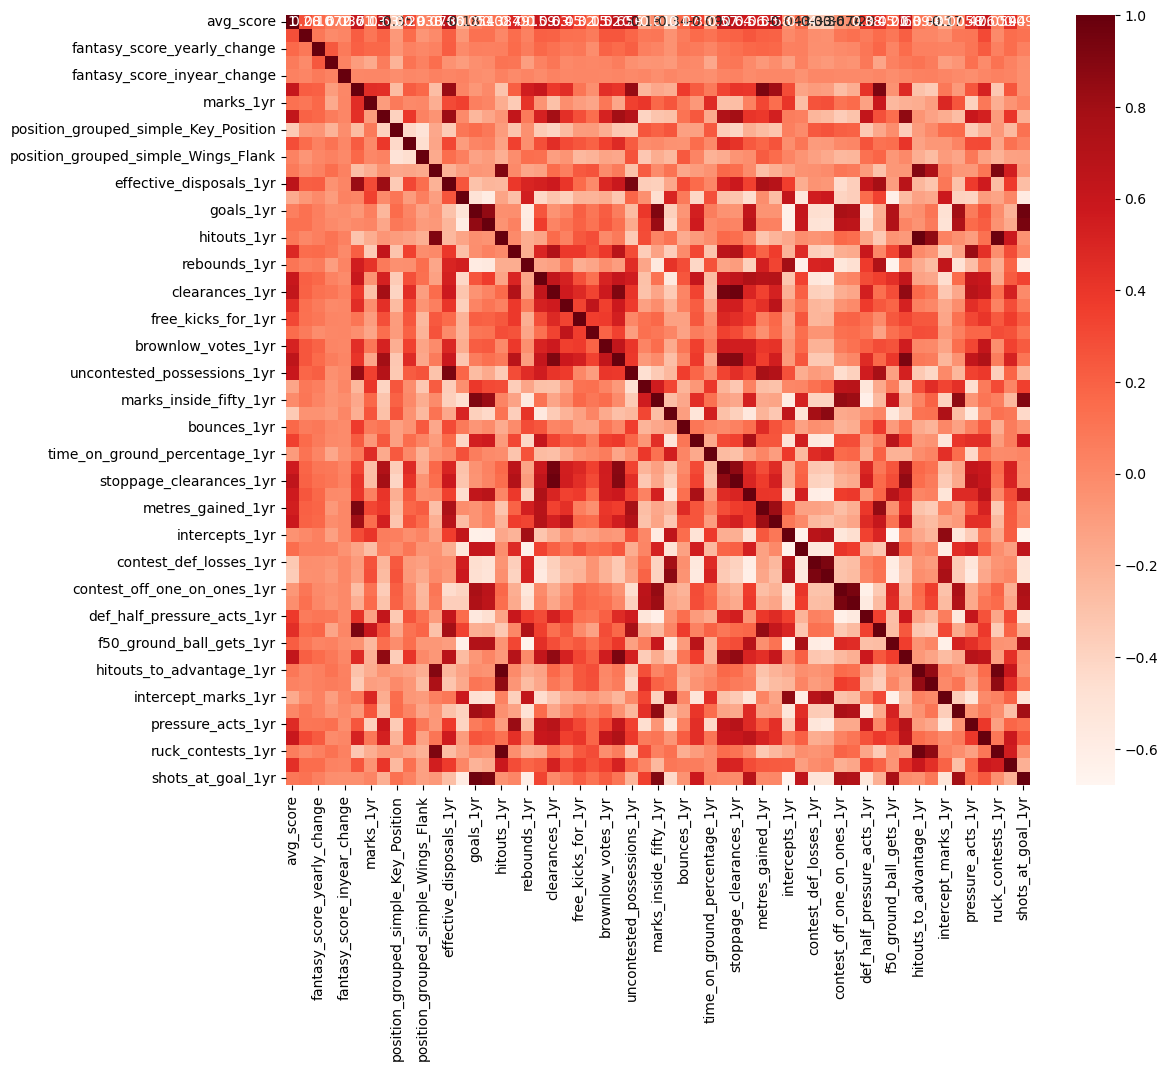

In [479]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = factors.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [480]:
import statsmodels.api as sm
#Correlation with output variable
cor_target = abs(cor["avg_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

avg_score                      1.000000
kicks_1yr                      0.609924
handballs_1yr                  0.629552
effective_disposals_1yr        0.661809
inside_fifties_1yr             0.593264
clearances_1yr                 0.629892
brownlow_votes_1yr             0.517246
contested_possessions_1yr      0.646269
uncontested_possessions_1yr    0.597456
centre_clearances_1yr          0.565783
stoppage_clearances_1yr        0.639349
score_involvements_1yr         0.562950
metres_gained_1yr              0.545785
turnovers_1yr                  0.577617
ground_ball_gets_1yr           0.631705
rating_points_1yr              0.599127
Name: avg_score, dtype: float64

In [481]:
## Test data error (AN has found best perfoming is 0.7)
lr.score(X_test, y_test).round(3)


0.664

In [482]:
## Train data error
lr.score(X_train, y_train).round(3)

0.676

In [496]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 101.51200962769686


In [484]:
#predict y-value based on testing data
y_pred = lr.predict(X_test)

#comparing y-value actual and prediction of testing data
df_compare = pd.DataFrame({'Actual' : y_test, 'Prediction': y_pred})

model_output = df_compare.join(factors, lsuffix='_caller', rsuffix='_other', how='inner')

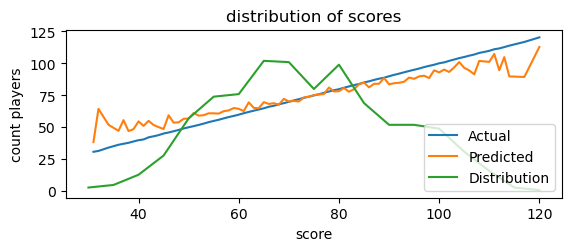

In [485]:
y_test_df = pd.DataFrame({'Predicted' : y_test})

acc_chart = model_output.groupby(round(model_output['Actual'])).agg({'Prediction': 'mean', 'Actual': 'mean'})
dist_chart = model_output.groupby(round(model_output['Actual']/5)*5).agg({'Prediction': 'mean', 'Actual': 'mean', 'avg_score': 'count'})

# acc_chart.sort_values(by=['Actual'], ascending=True)

plt.subplot(2,1,1)
plt.plot(acc_chart['Actual'])
plt.plot(acc_chart['Prediction'])
plt.plot(dist_chart['avg_score'])
plt.title('distribution of scores')
plt.ylabel('count players')
plt.xlabel('score')
plt.legend(['Actual', 'Predicted','Distribution',], loc='lower right')


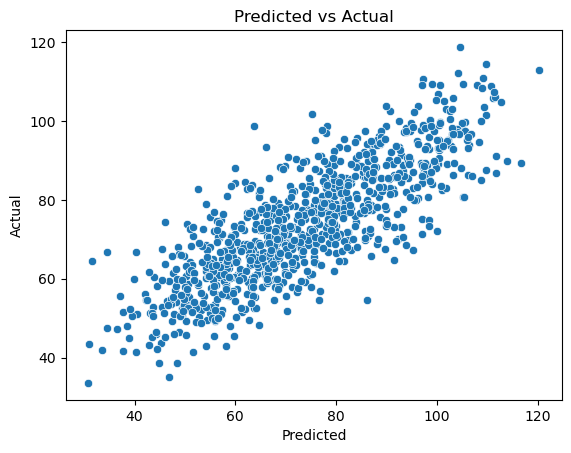

In [486]:
# Plotting residuals
sns.scatterplot(x=model_output['Actual'], y=model_output['Prediction'])
plt.title("Predicted vs Actual")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

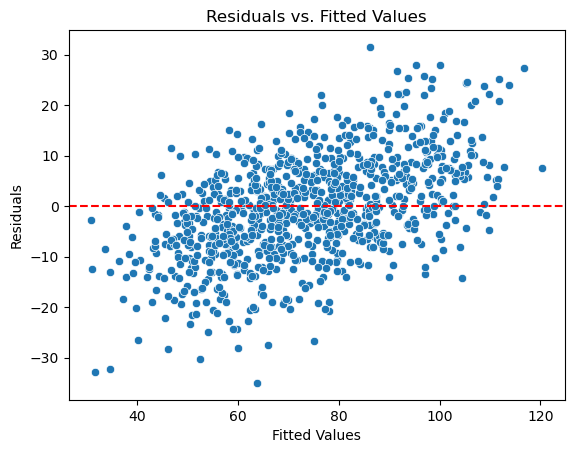

In [487]:
resid_chart = model_output

resid_chart['residusals'] = resid_chart['Actual'] - resid_chart['Prediction']

# Plotting residuals
sns.scatterplot(x=resid_chart['Actual'], y=resid_chart['residusals'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [488]:
test_pred = df_compare.join(factors_prep, lsuffix='_caller', rsuffix='_other', how='left')

test_pred.to_csv(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Outputs\test_prep.csv',mode='w+')
# np.savetxt(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\test_pred_val.csv', test_pred)


In [489]:

#predict using new data 
y_pred_new = lr.predict(X_new)
y_pred_new = pd.DataFrame({'Predicted' : y_pred_new})

X_new_reset = X_new.reset_index()
factors_23_reset = factors_prep_23.reset_index()

pred_output = y_pred_new.join(factors_23_reset, lsuffix='_caller', rsuffix='_other', how='left')

# Write predictions to csv
# pred_output.to_csv(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Outputs\Model_pred.csv')

print(factors_prep_23.shape)
print(X_new.shape)

(501, 173)
(501, 56)


In [490]:
## Sort by highest predicted score


pred_output['upside'] = pred_output['Predicted'] - pred_output['afl_fantasy_score_1yr']



pred_output[['player_name','age_1yr', 'position_grouped','matches_x','Predicted','afl_fantasy_score_1yr', 'upside']]\
    .to_csv(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Outputs\pred_output.csv',mode='w+')



pred_output[['player_name','age_1yr', 'position_grouped','matches_x','Predicted','afl_fantasy_score_1yr', 'upside']]\
.sort_values(by=['Predicted'], ascending=False).head(20)

,player_name,age_1yr,position_grouped,matches_x,Predicted,afl_fantasy_score_1yr,upside
45,"Brayshaw, Andrew",24.0,C,23,110.75000,110.347826,0.402174
316,"Merrett, Zach",28.0,C,22,110.56250,112.863636,-2.301136
350,"Oliver, Clayton",26.0,C,15,110.21875,115.066667,-4.847917
465,"Walsh, Sam",23.0,C,17,110.00000,100.588235,9.411765
253,"Laird, Rory",30.0,C,22,109.90625,109.227273,0.678977
322,"Miller, Touk",27.0,C,12,109.84375,100.166667,9.677083
40,"Bontempelli, Marcus",28.0,C,23,109.71875,116.956522,-7.237772
109,"Daicos, Nick",20.0,HBF,21,109.68750,111.809524,-2.122024
450,"Taranto, Tim",25.0,C,23,108.12500,112.434783,-4.309783
177,"Green, Tom",22.0,C,22,107.78125,108.727273,-0.946023


In [491]:
pred_output[['player_name','age_1yr', 'matches_x','Predicted','afl_fantasy_score_1yr', 'upside']].sort_values(by=['afl_fantasy_score_1yr'], ascending=False).head(20)

,player_name,age_1yr,matches_x,Predicted,afl_fantasy_score_1yr,upside
143,"English, Tim",26.0,23,95.93750,118.695652,-22.758152
40,"Bontempelli, Marcus",28.0,23,109.71875,116.956522,-7.237772
280,"Marshall, Rowan",28.0,24,101.18750,116.750000,-15.562500
350,"Oliver, Clayton",26.0,15,110.21875,115.066667,-4.847917
119,"Dawson, Jordan",26.0,23,102.46875,113.434783,-10.966033
316,"Merrett, Zach",28.0,22,110.56250,112.863636,-2.301136
450,"Taranto, Tim",25.0,23,108.12500,112.434783,-4.309783
183,"Gulden, Errol",21.0,24,102.00000,112.250000,-10.250000
109,"Daicos, Nick",20.0,21,109.68750,111.809524,-2.122024
45,"Brayshaw, Andrew",24.0,23,110.75000,110.347826,0.402174


In [492]:
pred_output[['player_name','age_1yr', 'matches_x','Predicted','afl_fantasy_score_1yr', 'upside']].sort_values(by=['upside'], ascending=False)\
    .query('Predicted >= 70').head(20)

,player_name,age_1yr,matches_x,Predicted,afl_fantasy_score_1yr,upside
128,"Dow, Thomson",21.0,5,70.03125,53.000000,17.031250
37,"Boak, Travis",35.0,16,87.09375,70.375000,16.718750
375,"Prestia, Dion",31.0,20,92.56250,75.850000,16.712500
237,"Jones, Zak",27.0,10,86.50000,70.700000,15.800000
210,"Hollands, Elijah",21.0,7,70.46875,55.142857,15.325893
39,"Bonner, Riley",26.0,8,75.81250,61.250000,14.562500
190,"Hawkins, Tom",35.0,20,77.31250,63.000000,14.312500
150,"Fisher, Zac",25.0,12,83.28125,69.000000,14.281250
73,"Campbell, Tom",30.0,9,70.71875,56.555556,14.163194
175,"Graham, Jack",25.0,19,76.06250,62.368421,13.694079


Text(0.5, 0, 'Pred Upside')

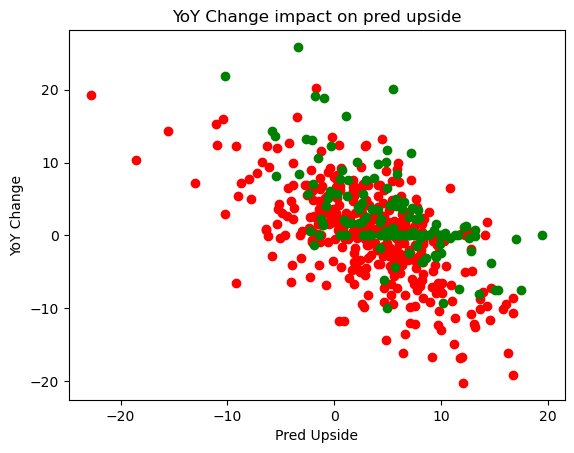

In [493]:

pred_output_chart_U22 = pred_output.query('age_1yr <= 22')\
# .groupby(round(pred_output['fantasy_score_yearly_change'])).agg({'upside': 'mean', 'fantasy_score_yearly_change': 'mean'})

pred_output_chart_O22 = pred_output.query('age_1yr > 22')\
# .groupby(round(pred_output['fantasy_score_yearly_change'])).agg({'upside': 'mean', 'fantasy_score_yearly_change': 'mean'})



plt.scatter(pred_output_chart_O22['upside'], pred_output_chart_O22['fantasy_score_yearly_change'], c='red')
plt.scatter(pred_output_chart_U22['upside'], pred_output_chart_U22['fantasy_score_yearly_change'], c='green')
plt.title('YoY Change impact on pred upside')
plt.ylabel('YoY Change')
plt.xlabel('Pred Upside')

# plt.subplot(2,1,1)
# plt.plot(pred_output_chart['fantasy_score_yearly_change'])
# plt.plot(pred_output_chart['upside'])
# plt.title('YoY Change impact on pred upside')
# plt.ylabel('YoY change')
# plt.xlabel('Upside')
# plt.legend(['train', 'test'], loc='lower right')

In [494]:
data_new = X_train
results = lr.predict(data_new)

np.savetxt(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\predictions.csv', results)
results

array([ 71.8125 ,  68.25   ,  71.28125, ...,  65.3125 , 101.5    ,
        88.15625])

In [495]:
np.savetxt(r'C:\Users\anoble\Git\Outside_Work\AFL Fantasy\Data\Inputs\train.csv', y_train)
y_train

1999     75.772727
841      62.294118
4197     64.692308
2076     50.700000
2569     77.681818
           ...    
4762     70.750000
1617     94.640000
1912     64.120000
416     110.347826
1861     81.454545
Name: avg_score, Length: 2124, dtype: float64